In [66]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
# Display settings or Output formatting categories in both pandas and NumPy.
pd.set_option('display.max_columns', None) # This option controls the maximum number of columns displayed
pd.set_option('display.width', None) # Adjusts how wide a DataFrame is displayed in the console or terminal.
np.set_printoptions(threshold=np.inf) # All elements of the array will be printed,
plt.rcParams['figure.figsize']=[15,8] # Used to set the default figure size for all plots globally.
np.set_printoptions(suppress = True)  # Prevents NumPy from using scientific notation (e.g., 1e-10) for small floating-point numbers.

In [12]:
# Loading the cleaned dataset 
df = pd.read_csv('Capstone_3Months_Null_impt.csv')

In [14]:
# No of Rows and Columns in the Dataset 
print(f'No.of Rows : {df.shape[0]}')
print(f'No.of Columns : {df.shape[1]}')

No.of Rows : 170717
No.of Columns : 10


In [16]:
df.tail()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Month,Region
170712,Vodafone,Indoor,3G,5,Satisfactory,28.684279,77.192623,Delhi,September,North
170713,Vodafone,Outdoor,3G,3,Poor Voice Quality,28.504523,77.059813,Delhi,September,North
170714,Airtel,Indoor,Unknown,3,Poor Voice Quality,11.691435,78.114439,Tamil Nadu,September,South
170715,Airtel,Indoor,4G,5,Satisfactory,10.813862,78.640406,Tamil Nadu,September,South
170716,Idea,Indoor,Unknown,4,Satisfactory,19.186049,72.976215,Maharashtra,September,West


### Multicollinearity Check with VIF 

In [19]:
X = df.select_dtypes(include = 'object') 
# label encoding for category columns
for i in X.columns:
    le = LabelEncoder()
    X[i] = le.fit_transform(X[i])
X['Latitude'] = df['Latitude']
X['Longitude'] = df['Longitude']
# scaling 
ss=StandardScaler()
df_multicollinearity=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
VIF=pd.DataFrame()
VIF['Features']=df_multicollinearity.columns
VIF['VIF']=[variance_inflation_factor(df_multicollinearity.values,i) for i in range (df_multicollinearity.shape[1])]
VIF

<IPython.core.display.Javascript object>

,Features,VIF
0,Operator,1.100627
1,In Out Travelling,1.005831
2,Network Type,1.015367
3,Call Drop Category,1.030512
4,State Name,1.145495
5,Month,1.003384
6,Region,3.762140
7,Latitude,1.518119
8,Longitude,3.311502


#### Inference
In the analysis of multicollinearity among the categorical features, scaling was applied, and the Variance Inflation Factor (VIF) values were calculated. All VIF values were found to be below 5, indicating that there is no significant multicollinearity present among the features. Therefore, all features were retained and used for model building.

### Statistical Test - Predictors(Independent variables) vs Target variable 

Statistical test for between categorical columns and target column

**Null Hypothesis and Alternative Hypothesis**
* Null Hypothesis (H₀): The target variable (Rating) is independent of the independent feature.
* Alternative Hypothesis (H₁): The target variable (Rating) is dependent on the independent feature.


When Null Hypothesis is Rejected:
* Dependence Identified: If the p-value < α (e.g., 0.05), the test suggests a statistically significant relationship between the feature and the target variable.
* Model Relevance: This indicates that the independent feature could provide predictive power for your target variable (Rating), making it relevant to include in your model.

When Null Hypothesis is Not Rejected:
* No Evidence of Dependence: If the p-value ≥ α, the test does not provide evidence of a relationship between the feature and the target variable.
* Possible Irrelevance: The feature may not contribute meaningfully to predicting the target variable and can be considered for exclusion.


In [24]:
# Create a contingency table
for i in df.select_dtypes(include = 'object').columns:
    contingency_table = pd.crosstab(df[i], df['Rating'])
    print(f"\033[1mContingency Table {i}, Rating:\033[0m")
    print(contingency_table)
    # Perform the chi-squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print("\nChi-Squared Test Results:")
    print(f"Chi-Squared Statistic:{round(chi2_stat,3)}")
    print(f"p-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("\nExpected Frequencies:")
    print(expected)
    # Interpret p-value
    alpha = 0.05
    if p_value < alpha:
        print(f"\033[1mConclusion: Reject the null hypothesis. Ratings depend on {i}.\033[0m")
    else:
        print(f"\033[1mConclusion: Fail to reject the null hypothesis. Ratings are independent of {i}.\033[0m")
    print('-------------------------------------------------------------------------------')
    print('-------------------------------------------------------------------------------')

Contingency Table Operator, Rating:
Rating        1     2     3      4      5
Operator                                 
Airtel     9431  3454  5970   8509   9146
BSNL       3615  1720  1653   4174   5915
Idea       3150  1754  1369   3580   3000
MTNL        134    40    38     57   1137
Others       26    19    18      4     49
RJio      12238  6350  9271  16239  25465
Tata        126   156   173     47     96
Vodafone   5016  1723  2694   7756  15405

Chi-Squared Test Results:
Chi-Squared Statistic:8114.759
p-value: 0.0
Degrees of Freedom: 28

Expected Frequencies:
[[ 7214.87233257  3254.13497191  4530.89534141  8632.78208966
  12877.31526444]
 [ 3374.64735205  1522.07238881  2119.25773063  4037.85318392
   6023.16934459]
 [ 2539.92752919  1145.58742246  1595.05882835  3039.08924126
   4533.33697874]
 [  277.84471377   125.31672886   174.48476719   332.44841463
    495.90537556]
 [   22.92317695    10.33907578    14.39561379    27.42817646
     40.91395702]
 [13746.59446921  6200.1476

#### Inference 
* The Chi-Square test results show that all categorical features have rejected the null hypothesis, indicating a significant association with the target variable. This suggests that each feature contributes meaningfully to the target and will be considered for model building.


### Class Imbalance 

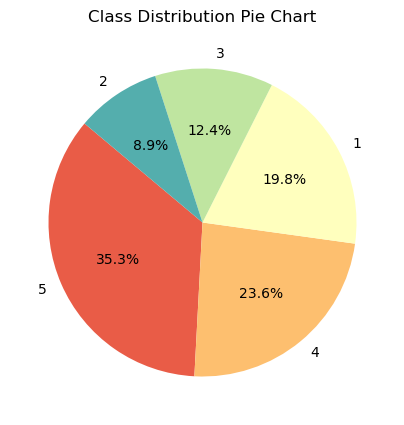

In [28]:
# Count the occurrences of each class
class_counts = df['Rating'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral', len(class_counts)))
plt.title('Class Distribution Pie Chart')
plt.show()

#### Inference
* The majority of the ratings are concentrated in the higher ratings (such as 5, with 35.3% of the total), while ratings like 2 and 3 have lower proportions (8.9% and 12.4%, respectively).
* This imbalance could lead to challenges in model training, as the model may become biased towards predicting the majority classes 
(such as 5).

### Feature Engineering
* Whether any transformations are required:
  
Categorical Variables (e.g., Operator, In/Out/Traveling, Network Type, Call Drop Category, State Name, Region, Month). These need to be transformed into numerical format for machine learning models. Label Encoding will be done for these.
* Scaling the data:

Since this dataset contains numerical features like Latitude and Longitude, scaling might be necessary. Models like k-NN, Logistic Regression can perform better when all features are on a similar scale.
* Feature Selection:

For a small dataset with only a few columns, it is generally safe to include all features in the analysis, as there is no obvious redundancy or lack of correlation with the target variable. Therefore, no columns will be removed.
* Dimensionality Reduction:

Since the dataset contains only a few features, there is no need for dimensionality reduction, as reducing dimensions could lead to the loss of important information. Therefore, dimensionality reduction will not be applied.


### Encoding, Splitting the Data, and Conducting Statistical Tests on Train and Test Sets

#### Pre-Modeling Considerations
  
The target column is rating of the call quality, which is a categorical variable with values ranging from 1 to 5. This makes the problem a multi-class classification task. The goal is to build predictive models that can accurately classify the call quality rating based on various input features, such as operator, network type, geographic location, and other related factors. 

Several classification algorithms, including decision trees, random forests, and logistic regression, will be considered for model building. The model's performance will be evaluated using appropriate metrics, such as accuracy, precision, recall, and F1-score, to ensure robust predictions and handle any class imbalance.

The dataset was split into training and testing sets with a 70-30 ratio for model building. To ensure that the training and testing data were representative of the same underlying distribution, we performed a series of tests. These included a Chi-Square test for categorical columns and a Kolmogorov-Smirnov test for numerical columns to compare the distributions of features between the two sets. This step was crucial to confirm that the model would generalize well and perform consistently on unseen data.


In [34]:
# Spliting the dataset into train and test
train_data,test_data=train_test_split(df,test_size=0.3,random_state=11)


Distribution of Operator in train data:
Operator
RJio        0.408766
Airtel      0.212383
Vodafone    0.191580
BSNL        0.099547
Idea        0.075146
MTNL        0.008326
Tata        0.003573
Others      0.000678
Name: proportion, dtype: float64

Distribution of Operator in test data:
Operator
RJio        0.404463
Airtel      0.217315
Vodafone    0.189394
BSNL        0.101160
Idea        0.075621
MTNL        0.008025
Tata        0.003339
Others      0.000683
Name: proportion, dtype: float64

Contingency Table (Train vs Test):
 Dataset    Test  Train
Operator              
airtel    11130  25380
bsnl       5181  11896
idea       3873   8980
mtnl        411    995
others       35     81
rjio      20715  48848
tata        171    427
vodafone   9700  22894

Chi-Square Statistic: 8.602541643968376, p-value: 0.28246475798903026

Chi-Square test for Operator: p-value = 0.28246475798903026
The distributions of Operator in the train and test data are similar.


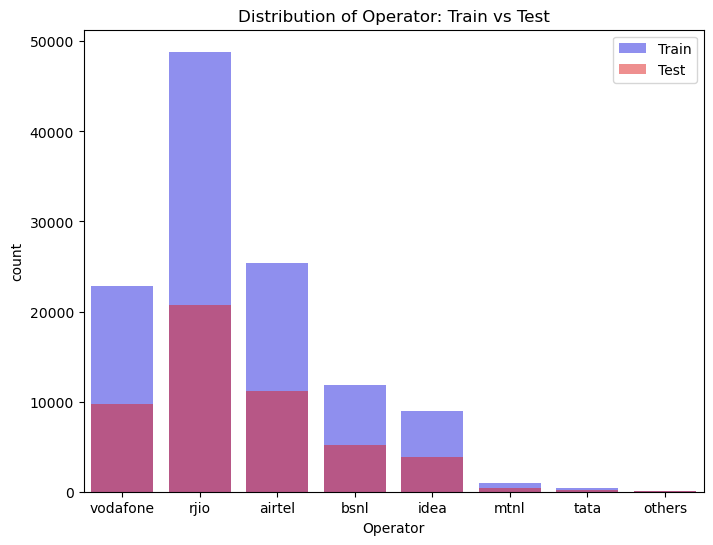


Distribution of In Out Travelling in train data:
In Out Travelling
Indoor        0.684814
Outdoor       0.190802
Travelling    0.124384
Name: proportion, dtype: float64

Distribution of In Out Travelling in test data:
In Out Travelling
Indoor        0.683068
Outdoor       0.191542
Travelling    0.125391
Name: proportion, dtype: float64

Contingency Table (Train vs Test):
 Dataset    Test  Train
Operator              
airtel    11130  25380
bsnl       5181  11896
idea       3873   8980
mtnl        411    995
others       35     81
rjio      20715  48848
tata        171    427
vodafone   9700  22894

Chi-Square Statistic: 8.602541643968376, p-value: 0.28246475798903026

Chi-Square test for In Out Travelling: p-value = 0.28246475798903026
The distributions of In Out Travelling in the train and test data are similar.


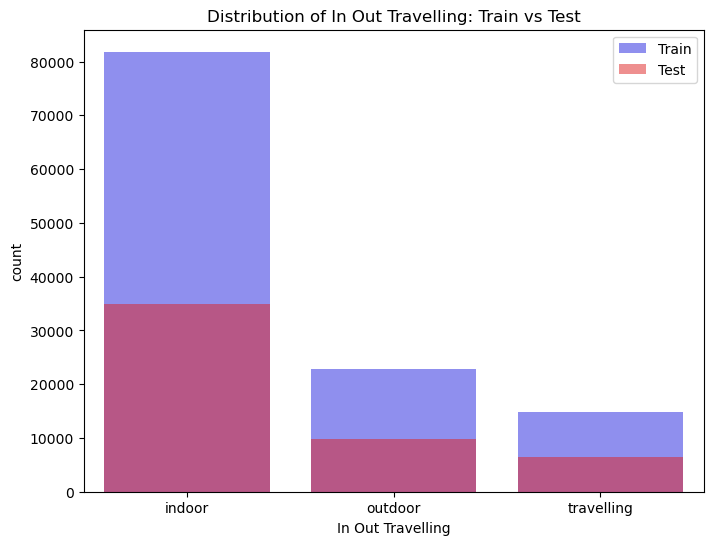


Distribution of Network Type in train data:
Network Type
4G         0.570004
3G         0.216299
Unknown    0.161706
2G         0.051991
Name: proportion, dtype: float64

Distribution of Network Type in test data:
Network Type
4G         0.571794
3G         0.217217
Unknown    0.159540
2G         0.051449
Name: proportion, dtype: float64

Contingency Table (Train vs Test):
 Dataset    Test  Train
Operator              
airtel    11130  25380
bsnl       5181  11896
idea       3873   8980
mtnl        411    995
others       35     81
rjio      20715  48848
tata        171    427
vodafone   9700  22894

Chi-Square Statistic: 8.602541643968376, p-value: 0.28246475798903026

Chi-Square test for Network Type: p-value = 0.28246475798903026
The distributions of Network Type in the train and test data are similar.


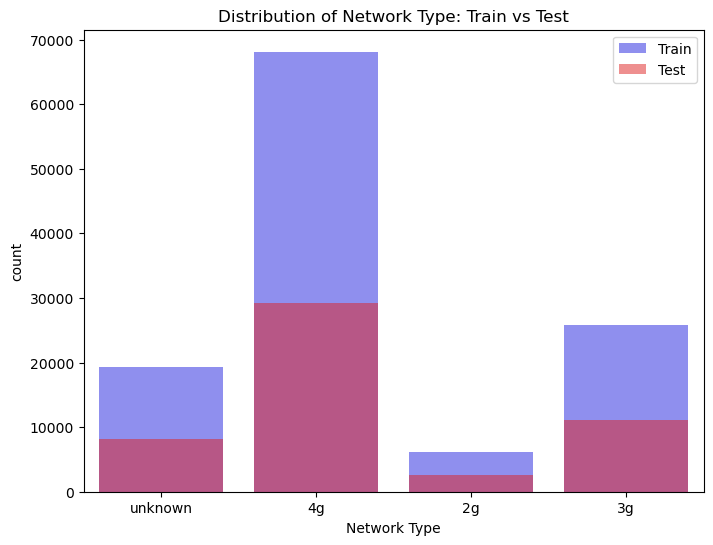


Distribution of Call Drop Category in train data:
Call Drop Category
Satisfactory          0.666086
Poor Voice Quality    0.252835
Call Dropped          0.081079
Name: proportion, dtype: float64

Distribution of Call Drop Category in test data:
Call Drop Category
Satisfactory          0.661141
Poor Voice Quality    0.254998
Call Dropped          0.083861
Name: proportion, dtype: float64

Contingency Table (Train vs Test):
 Dataset    Test  Train
Operator              
airtel    11130  25380
bsnl       5181  11896
idea       3873   8980
mtnl        411    995
others       35     81
rjio      20715  48848
tata        171    427
vodafone   9700  22894

Chi-Square Statistic: 8.602541643968376, p-value: 0.28246475798903026

Chi-Square test for Call Drop Category: p-value = 0.28246475798903026
The distributions of Call Drop Category in the train and test data are similar.


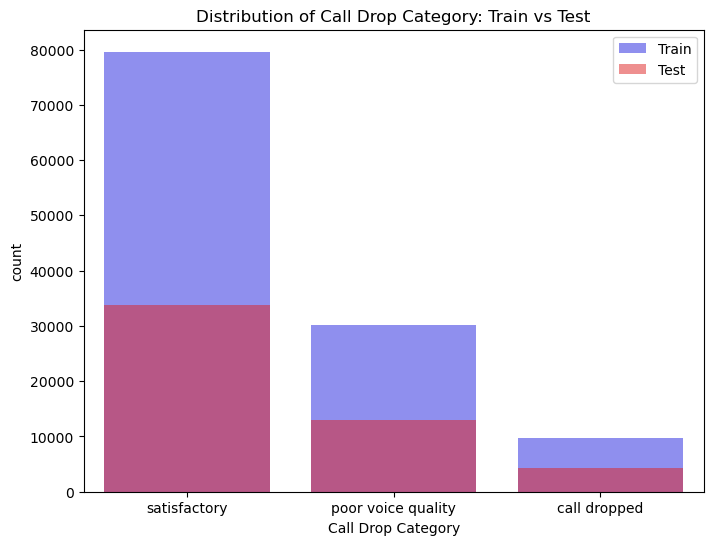


Distribution of State Name in train data:
State Name
Maharashtra                    0.267379
West Bengal                    0.072485
Rajasthan                      0.071188
Uttar Pradesh                  0.070886
Gujarat                        0.068050
Tamil Nadu                     0.062451
Karnataka                      0.059539
Delhi                          0.057079
Telangana                      0.055665
Odisha                         0.047339
Kerala                         0.033707
Haryana                        0.029648
Bihar                          0.026318
Madhya Pradesh                 0.018000
Andhra Pradesh                 0.016050
Uttarakhand                    0.010000
Chhattisgarh                   0.007556
Jharkhand                      0.006025
Punjab                         0.004862
Meghalaya                      0.003406
Assam                          0.003222
Chandigarh                     0.003121
Goa                            0.001774
Dadra and Nagar Haveli    

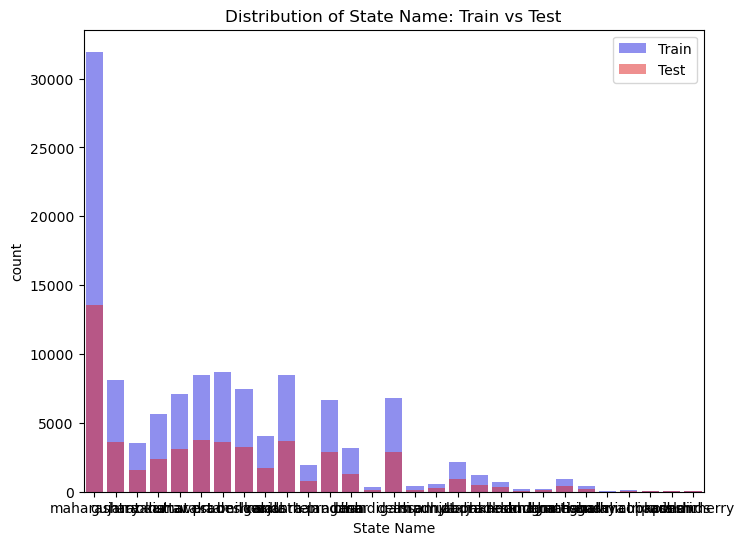


Distribution of Month in train data:
Month
July         0.371378
September    0.366256
August       0.262366
Name: proportion, dtype: float64

Distribution of Month in test data:
Month
July         0.376172
September    0.364769
August       0.259060
Name: proportion, dtype: float64

Contingency Table (Train vs Test):
 Dataset    Test  Train
Operator              
airtel    11130  25380
bsnl       5181  11896
idea       3873   8980
mtnl        411    995
others       35     81
rjio      20715  48848
tata        171    427
vodafone   9700  22894

Chi-Square Statistic: 8.602541643968376, p-value: 0.28246475798903026

Chi-Square test for Month: p-value = 0.28246475798903026
The distributions of Month in the train and test data are similar.


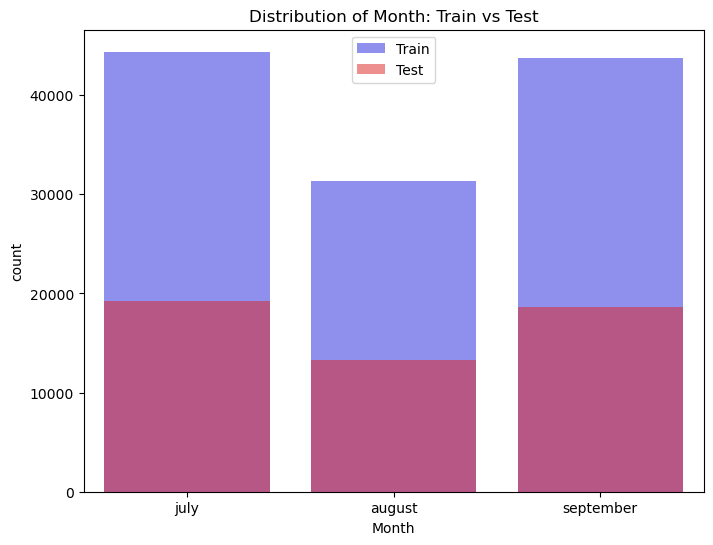


Distribution of Region in train data:
Region
West         0.409971
South        0.227998
North        0.177045
East         0.152409
Central      0.025556
Northeast    0.007021
Name: proportion, dtype: float64

Distribution of Region in test data:
Region
West         0.411161
South        0.228776
North        0.177952
East         0.149153
Central      0.026027
Northeast    0.006931
Name: proportion, dtype: float64

Contingency Table (Train vs Test):
 Dataset    Test  Train
Operator              
airtel    11130  25380
bsnl       5181  11896
idea       3873   8980
mtnl        411    995
others       35     81
rjio      20715  48848
tata        171    427
vodafone   9700  22894

Chi-Square Statistic: 8.602541643968376, p-value: 0.28246475798903026

Chi-Square test for Region: p-value = 0.28246475798903026
The distributions of Region in the train and test data are similar.


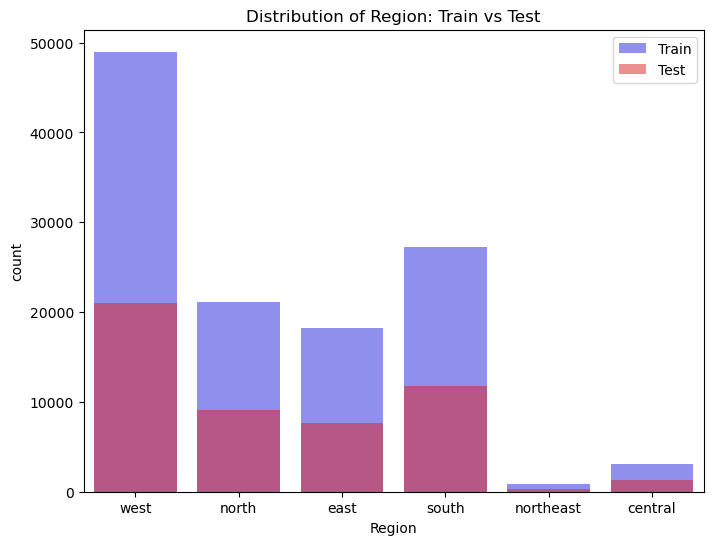


Rating statistics in train data:
count    119501.000000
mean          3.462766
std           1.520409
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64
Rating statistics in test data:
count    51216.000000
mean         3.445232
std          1.526827
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

KS test for Rating: p-value = 0.2429432659855495
The distributions of Rating in the train and test data are similar.


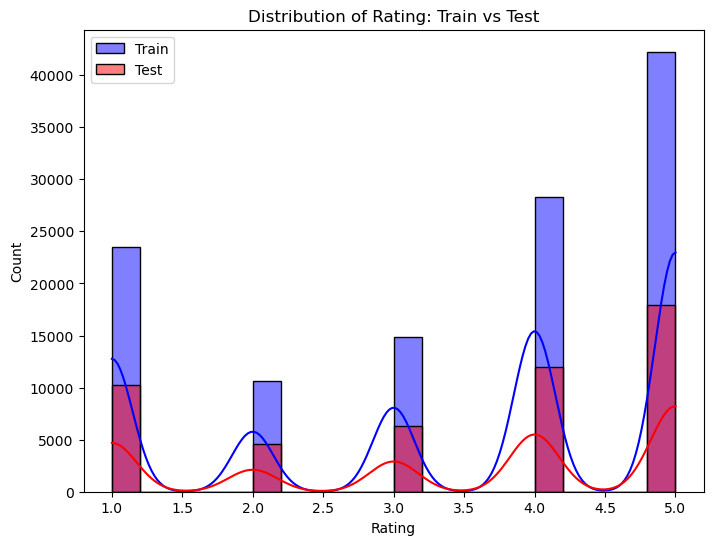


Latitude statistics in train data:
count    119501.000000
mean         21.010032
std           5.406598
min           8.084712
25%          18.452021
50%          20.310055
75%          25.788770
max          32.987526
Name: Latitude, dtype: float64
Latitude statistics in test data:
count    51216.000000
mean        21.012856
std          5.419210
min          8.197511
25%         18.447558
50%         20.310055
75%         26.072535
max         32.761533
Name: Latitude, dtype: float64

KS test for Latitude: p-value = 0.8543857282963234
The distributions of Latitude in the train and test data are similar.


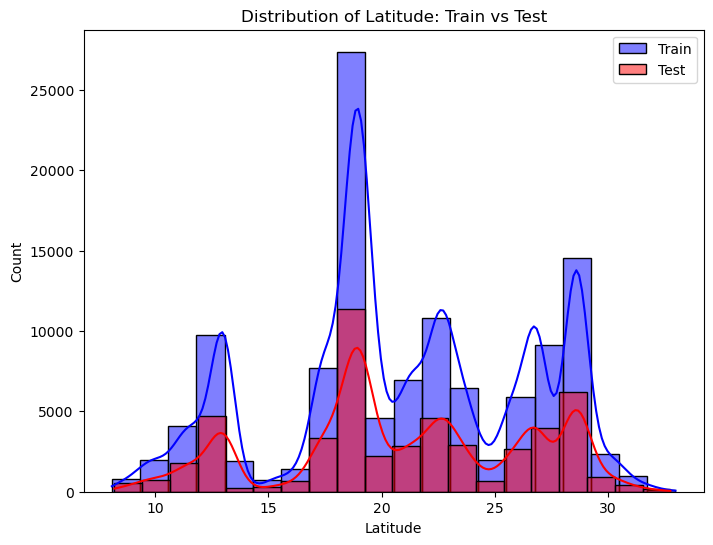


Longitude statistics in train data:
count    119501.000000
mean         77.779108
std           4.799246
min          68.965040
25%          73.794660
50%          77.159650
75%          79.096455
max          95.629638
Name: Longitude, dtype: float64
Longitude statistics in test data:
count    51216.000000
mean        77.742595
std          4.773770
min         69.017391
25%         73.794660
50%         77.149773
75%         79.078803
max         94.309320
Name: Longitude, dtype: float64

KS test for Longitude: p-value = 0.45009849821012893
The distributions of Longitude in the train and test data are similar.


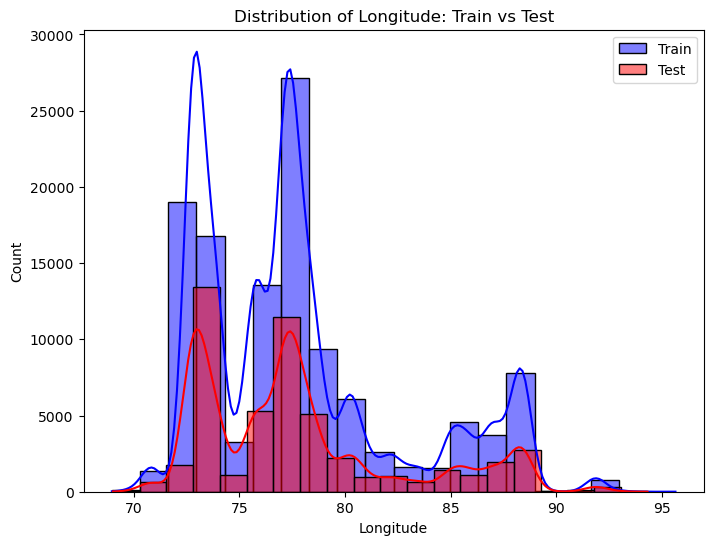

In [36]:
def check_categorical_representation(train_data, test_data, categorical_columns):
    """Check if the categorical columns in train and test data have similar distributions."""
    
    for column in categorical_columns:
        # Check frequency distributions
        train_freq = train_data[column].value_counts(normalize=True)
        test_freq = test_data[column].value_counts(normalize=True)
        
        print(f"\nDistribution of {column} in train data:\n{train_freq}")
        print(f"\nDistribution of {column} in test data:\n{test_freq}")
        
        # Chi-Square test for categorical distribution similarity
        train_data[column] = train_data[column].str.strip().str.lower()
        test_data[column] = test_data[column].str.strip().str.lower()

        # Step 1: Create combined DataFrame with train and test data
        train_data['Dataset'] = 'Train'
        test_data['Dataset'] = 'Test'

        combined_data = pd.concat([train_data, test_data], axis=0)

        # Step 2: Create contingency table comparing 'Operator' between 'Train' and 'Test' datasets
        contingency_table = pd.crosstab(combined_data['Operator'], combined_data['Dataset'])
        print("\nContingency Table (Train vs Test):\n", contingency_table)

        # Step 3: Perform Chi-Square test
        if contingency_table.size > 0:
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            print(f"\nChi-Square Statistic: {chi2_stat}, p-value: {p_value}")
        else:
            print("Contingency table is empty. Cannot perform Chi-Square test.")
        
        print(f"\nChi-Square test for {column}: p-value = {p_value}")
        if p_value < 0.05:
            print(f"The distributions of {column} in the train and test data are significantly different.")
        else:
            print(f"The distributions of {column} in the train and test data are similar.")
        
        # Visual comparison of distributions
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=train_data, color='blue', label="Train", alpha=0.5)
        sns.countplot(x=column, data=test_data, color='red', label="Test", alpha=0.5)
        plt.title(f"Distribution of {column}: Train vs Test")
        plt.legend()
        plt.show()

def check_numerical_representation(train_data, test_data, numerical_columns):
    """Check if the numerical columns in train and test data have similar distributions."""
    
    for column in numerical_columns:
        # Check basic statistics
        train_stats = train_data[column].describe()
        test_stats = test_data[column].describe()
        
        print(f"\n{column} statistics in train data:\n{train_stats}")
        print(f"{column} statistics in test data:\n{test_stats}")
        
        # Kolmogorov-Smirnov test for numerical distribution similarity
        statistic, p_value = ks_2samp(train_data[column], test_data[column])
        
        print(f"\nKS test for {column}: p-value = {p_value}")
        if p_value < 0.05:
            print(f"The distributions of {column} in the train and test data are significantly different.")
        else:
            print(f"The distributions of {column} in the train and test data are similar.")
        
        # Visual comparison of distributions
        plt.figure(figsize=(8, 6))
        sns.histplot(train_data[column], color='blue', label="Train", kde=True, bins=20, alpha=0.5)
        sns.histplot(test_data[column], color='red', label="Test", kde=True, bins=20, alpha=0.5)
        plt.title(f"Distribution of {column}: Train vs Test")
        plt.legend()
        plt.show()

def check_train_test_representation(train_data, test_data, categorical_columns, numerical_columns):
    """Run checks for both categorical and numerical columns to compare train and test data."""
    
    # Check categorical columns
    check_categorical_representation(train_data, test_data, categorical_columns)
    
    # Check numerical columns
    check_numerical_representation(train_data, test_data, numerical_columns)

# Sample data (replace this with your actual train and test data)

# Define categorical and numerical columns in your dataset
categorical_columns = df.select_dtypes('O')
numerical_columns = df.select_dtypes(np.number)

# Run the train-test representation check
check_train_test_representation(train_data, test_data, categorical_columns, numerical_columns) 

In [37]:
# Accessing Variables from Train and Test Sets
X_train=train_data.drop(['Dataset','Rating'],axis=1)
X_test=test_data.drop(['Dataset','Rating'],axis=1) 

In [38]:
# Accessing Variables from Train and Test Sets
y_train=train_data['Rating'] 
y_test=test_data['Rating'] 

In [39]:
# Label Encoding for Categorical Columns
le=LabelEncoder()
for col in X_train.select_dtypes(exclude = np.number).columns:
    X_train[col] = le.fit_transform(X_train[col])
for col in X_test.select_dtypes(exclude = np.number).columns:
    X_test[col] = le.fit_transform(X_test[col])

## Model Building 

### Logistic Regression - without scaling

In [26]:
Log_reg = LogisticRegression(class_weight='balanced',random_state=42)

Log_reg.fit(X_train,y_train)

# Predictions on training data
y_train_pred_Log_reg = Log_reg.predict(X_train)

# Predictions on testing data
y_test_pred_Log_reg = Log_reg.predict(X_test)


# Evaluate train model
print('***************************')
print("\033[1mLogistic Regression:\033[0m")
print('***************************')
print("\n\033[1mEvaluating performance on training data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_train, y_train_pred_Log_reg), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_Log_reg))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_Log_reg))
print('-' * 80)
print('-' * 80)


# Evaluate test model
print("\n\033[1mEvaluating performance on test data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_test, y_test_pred_Log_reg), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_Log_reg))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_Log_reg))

***************************
Logistic Regression:
***************************

Evaluating performance on training data

Accuracy: 0.5224

Confusion Matrix:
[[14002  8940   530     0     0]
 [ 4258  5960   382     0     0]
 [ 2619  2702  2807  4231  2475]
 [    0     0  3123 15864  9358]
 [    0     0  4889 13566 23795]]

Training Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.60      0.63     23472
           2       0.34      0.56      0.42     10600
           3       0.24      0.19      0.21     14834
           4       0.47      0.56      0.51     28345
           5       0.67      0.56      0.61     42250

    accuracy                           0.52    119501
   macro avg       0.48      0.49      0.48    119501
weighted avg       0.54      0.52      0.53    119501

--------------------------------------------------------------------------------
----------------------------------------------------------------------------

### Logistic Regression - with scaling

In [52]:
ss=StandardScaler()
X_train_sc=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)

Log_reg = LogisticRegression(class_weight='balanced',random_state=42)

Log_reg.fit(X_train_sc,y_train)

# Predictions on training data
y_train_pred_Log_reg_sc = Log_reg.predict(X_train_sc)

# Predictions on testing data
y_test_pred_Log_reg_sc = Log_reg.predict(X_test_sc)


# Evaluate train model
print('***************************')
print("\033[1mLogistic Regression:\033[0m")
print('***************************')
print("\n\033[1mEvaluating performance on training data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_train, y_train_pred_Log_reg_sc), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_Log_reg_sc))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_Log_reg_sc))
print('-' * 80)
print('-' * 80)


# Evaluate test model
print("\n\033[1mEvaluating performance on test data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_test, y_test_pred_Log_reg_sc), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_Log_reg_sc))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_Log_reg_sc))

<IPython.core.display.Javascript object>


KeyboardInterrupt



### Decision Tree Classifier

In [30]:
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(X_train,y_train)

# Predictions on training data
y_train_pred_dt = dt.predict(X_train)

# Predictions on testing data
y_test_pred_dt = dt.predict(X_test)


# Evaluate train model
print('***************************')
print("\033[1mDecision Tree Classifier:\033[0m")
print('***************************')
print("\n\033[1mEvaluating performance on training data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_train, y_train_pred_dt), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_dt))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_dt))
print('-' * 80)
print('-' * 80)


# Evaluate test model
print("\n\033[1mEvaluating performance on test data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_test, y_test_pred_dt), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

***************************
Decision Tree Classifier:
***************************

Evaluating performance on training data

Accuracy: 0.9633

Confusion Matrix:
[[23155   259    58     0     0]
 [  964  9527   109     0     0]
 [  233   243 13752   519    87]
 [    0     0   357 27465   523]
 [    0     0    51   985 41214]]

Training Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     23472
           2       0.95      0.90      0.92     10600
           3       0.96      0.93      0.94     14834
           4       0.95      0.97      0.96     28345
           5       0.99      0.98      0.98     42250

    accuracy                           0.96    119501
   macro avg       0.96      0.95      0.95    119501
weighted avg       0.96      0.96      0.96    119501

--------------------------------------------------------------------------------
-----------------------------------------------------------------------

### KNN

In [54]:

# Scaling the data
ss = StandardScaler()
X_train_sc = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)  # Use transform instead of fit_transform for test data

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_sc, y_train)

# Predictions on training data
y_train_pred_knn = knn.predict(X_train_sc)

# Predictions on testing data
y_test_pred_knn = knn.predict(X_test_sc)

# Evaluate train model
print('***************************')
print("\033[1mK-Nearest Neighbors (KNN):\033[0m")
print('***************************')
print("\n\033[1mEvaluating performance on training data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_train, y_train_pred_knn), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_knn))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_knn))
print('-' * 80)
print('-' * 80)

# Evaluate test model
print("\n\033[1mEvaluating performance on test data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_test, y_test_pred_knn), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_knn))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_knn))


***************************
K-Nearest Neighbors (KNN):
***************************

Evaluating performance on training data

Accuracy: 0.869

Confusion Matrix:
[[21609  1390   472     1     0]
 [ 2627  7463   508     1     1]
 [ 1302   624 10944  1366   598]
 [    0     1  1029 24843  2472]
 [    0     0   555  2704 38991]]

Training Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.92      0.88     23472
           2       0.79      0.70      0.74     10600
           3       0.81      0.74      0.77     14834
           4       0.86      0.88      0.87     28345
           5       0.93      0.92      0.92     42250

    accuracy                           0.87    119501
   macro avg       0.85      0.83      0.84    119501
weighted avg       0.87      0.87      0.87    119501

--------------------------------------------------------------------------------
-----------------------------------------------------------------------

### Naive Bayes

In [68]:
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Predictions on training data
y_train_pred_nb = nb.predict(X_train)

# Predictions on testing data
y_test_pred_nb = nb.predict(X_test)

# Evaluate train model
print('***************************')
print("\033[1mNaive Bayes Classifier:\033[0m")
print('***************************')
print("\n\033[1mEvaluating performance on training data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_train, y_train_pred_nb), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_nb))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_nb))
print('-' * 80)
print('-' * 80)

# Evaluate test model
print("\n\033[1mEvaluating performance on test data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_test, y_test_pred_nb), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_nb))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_nb))


***************************
Naive Bayes Classifier:
***************************

Evaluating performance on training data

Accuracy: 0.5663

Confusion Matrix:
[[19350  4081    41     0     0]
 [ 6485  4086    29     0     0]
 [ 4220  1601    10  4295  4708]
 [    0     0     0 14467 13878]
 [    0     0     0 12484 29766]]

Training Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.82      0.72     23472
           2       0.42      0.39      0.40     10600
           3       0.12      0.00      0.00     14834
           4       0.46      0.51      0.49     28345
           5       0.62      0.70      0.66     42250

    accuracy                           0.57    119501
   macro avg       0.45      0.49      0.45    119501
weighted avg       0.51      0.57      0.53    119501

--------------------------------------------------------------------------------
-------------------------------------------------------------------------

### Random Forest Classifier

In [70]:
rf = RandomForestClassifier(n_estimators= 100,random_state = 42)

rf.fit(X_train,y_train)

# Predictions on training data
y_train_pred_rf = rf.predict(X_train)

# Predictions on testing data
y_test_pred_rf = rf.predict(X_test)


# Evaluate train model
print('***************************')
print("\033[1mRandom Forest Classifier:\033[0m")
print('***************************')
print("\n\033[1mEvaluating performance on training data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_train, y_train_pred_rf), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rf))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print('-' * 80)
print('-' * 80)


# Evaluate test model
print("\n\033[1mEvaluating performance on test data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_test, y_test_pred_rf), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

***************************
Random Forest Classifier:
***************************

Evaluating performance on training data

Accuracy: 0.9633

Confusion Matrix:
[[22972   404    96     0     0]
 [  814  9616   170     0     0]
 [  187   196 13728   618   105]
 [    0     0   256 27387   702]
 [    0     0    31   812 41407]]

Training Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     23472
           2       0.94      0.91      0.92     10600
           3       0.96      0.93      0.94     14834
           4       0.95      0.97      0.96     28345
           5       0.98      0.98      0.98     42250

    accuracy                           0.96    119501
   macro avg       0.96      0.95      0.95    119501
weighted avg       0.96      0.96      0.96    119501

--------------------------------------------------------------------------------
-----------------------------------------------------------------------

In [33]:
Models_Accuracy_Comparison = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy"])

models = ['Logistic Regression -without scaling','Logistic Regression -with scaling', 'Decision Tree Classifier','Random Forest Classifier']
Train_accuracy = [round(accuracy_score(y_train, y_train_pred_Log_reg)*100, 2),
                  round(accuracy_score(y_train, y_train_pred_Log_reg_sc)*100, 2),
                  round(accuracy_score(y_train, y_train_pred_dt)*100, 2),
                  round(accuracy_score(y_train, y_train_pred_rf)*100, 2)]

Test_accuracy = [round(accuracy_score(y_test, y_test_pred_Log_reg)*100, 2),
                 round(accuracy_score(y_test, y_test_pred_Log_reg_sc)*100, 2),
                  round(accuracy_score(y_test, y_test_pred_dt)*100, 2),
                  round(accuracy_score(y_test, y_test_pred_rf)*100, 2)]

Models_Accuracy_Comparison['Model'] = models
Models_Accuracy_Comparison['Train Accuracy'] = Train_accuracy
Models_Accuracy_Comparison['Test Accuracy'] = Test_accuracy
Models_Accuracy_Comparison['Diff_%'] = Models_Accuracy_Comparison['Train Accuracy'] - Models_Accuracy_Comparison['Test Accuracy']
Models_Accuracy_Comparison

,Model,Train Accuracy,Test Accuracy,Diff_%
0,Logistic Regression -without scaling,52.24,52.08,0.16
1,Logistic Regression -with scaling,52.62,52.38,0.24
2,Decision Tree Classifier,96.33,83.76,12.57
3,Random Forest Classifier,96.33,85.41,10.92


#### Summary:

* Logistic Regression: Struggled to capture non-linear relationships in the data, leading to poor performance with 52.24% training accuracy and 52.08% test accuracy. It failed to generalize well, especially for middle-range ratings (classes 3 and 4).
* Decision Tree: Showed 96.33% training accuracy (overfitting) and 83.76% test accuracy. It performed well on classes 1 and 5 but had lower recall for classes 3 and 4. Decision Trees capture non-linear relationships but are prone to overfitting.
* Random Forest: Best performing model with 96.33% training accuracy and 85.41% test accuracy. It handled class imbalance better and provided high recall across all classes, thanks to the ensemble approach that reduces overfitting.

  
Why Decision Tree and Random Forest Worked Better:

1.	Non-linearity: Logistic Regression failed to capture complex patterns, while Decision Trees and Random Forests handle non-linear relationships well.
2.	Overfitting: Random Forest reduced overfitting, unlike the single Decision Tree.
3.	Class Imbalance: Random Forest handled imbalanced classes better.
4.	Model Complexity: Decision Trees and Random Forests were more suited for the complex dataset compared to Logistic Regression.


Conclusion:
Random Forest performed best due to its ability to handle complexity, overfitting, and class imbalance.



# HyperParameter Tunning

In [36]:
rf = RandomForestClassifier(n_estimators= 100,random_state = 42)

rf.fit(X_train,y_train)

# Predictions on training data
y_train_pred_rf = rf.predict(X_train)

# Predictions on testing data
y_test_pred_rf = rf.predict(X_test)


# Evaluate train model
print('***************************')
print("\033[1mRandom Forest Classifier:\033[0m")
print('***************************')
print("\n\033[1mEvaluating performance on training data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_train, y_train_pred_rf), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rf))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print('-' * 80)
print('-' * 80)


# Evaluate test model
print("\n\033[1mEvaluating performance on test data\033[0m\n")
print("Accuracy:", round(accuracy_score(y_test, y_test_pred_rf), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

***************************
Random Forest Classifier:
***************************

Evaluating performance on training data

Accuracy: 0.9633

Confusion Matrix:
[[22972   404    96     0     0]
 [  814  9616   170     0     0]
 [  187   196 13728   618   105]
 [    0     0   256 27387   702]
 [    0     0    31   812 41407]]

Training Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     23472
           2       0.94      0.91      0.92     10600
           3       0.96      0.93      0.94     14834
           4       0.95      0.97      0.96     28345
           5       0.98      0.98      0.98     42250

    accuracy                           0.96    119501
   macro avg       0.96      0.95      0.95    119501
weighted avg       0.96      0.96      0.96    119501

--------------------------------------------------------------------------------
-----------------------------------------------------------------------

In [37]:
X_train=train_data.drop(['Dataset','Rating'],axis=1)
X_test=test_data.drop(['Dataset','Rating'],axis=1) 

In [38]:
# Accessing Variables from Train and Test Sets
y_train=train_data['Rating'] 
y_test=test_data['Rating'] 

In [39]:
# Step 2: Load and prepare data
# Assuming train_data and test_data are your datasets
X_train = train_data.drop(['Dataset', 'Rating'], axis=1)
X_test = test_data.drop(['Dataset', 'Rating'], axis=1)
y_train = train_data['Rating']
y_test = test_data['Rating']

# Step 3: Label Encoding for Categorical Columns
le = LabelEncoder()
for col in X_train.select_dtypes(exclude=np.number).columns:
    X_train[col] = le.fit_transform(X_train[col])
for col in X_test.select_dtypes(exclude=np.number).columns:
    X_test[col] = le.fit_transform(X_test[col])

# Step 4: Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 5: Define the hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 6: Set up GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)

# Step 7: Fit the model with GridSearchCV
print("Tuning Random Forest...")
rf_grid_search.fit(X_train, y_train)

# Step 8: Get the best parameters and best score
print("\nBest Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest Accuracy:", rf_grid_search.best_score_)

# Step 9: Evaluate on the test set
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

# Step 10: Print accuracy and classification report on the test set
print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nRandom Forest Test Classification Report:")
print(classification_report(y_test, rf_predictions))

<IPython.core.display.Javascript object>

Tuning Random Forest...
Fitting 3 folds for each of 162 candidates, totalling 486 fits

Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Accuracy: 0.8530472452905432

Random Forest Test Accuracy: 0.8576811933770697

Random Forest Test Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.90      0.87     10264
           2       0.73      0.65      0.69      4616
           3       0.82      0.70      0.76      6352
           4       0.85      0.87      0.86     12021
           5       0.92      0.93      0.92     17963

    accuracy                           0.86     51216
   macro avg       0.83      0.81      0.82     51216
weighted avg       0.86      0.86      0.86     51216



In [1]:
# Accessing Variables from Train and Test Sets
X_train=train_data.drop(['Dataset','Rating'],axis=1)
X_test=test_data.drop(['Dataset','Rating'],axis=1) 
y_train = train_data['Rating']
y_test = test_data['Rating']


# Step 4: Define the Random Forest model with the best parameters
rf_model = RandomForestClassifier(
    bootstrap=True, 
    max_depth=5, 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200,
)


# Step 3: Label Encoding for Categorical Columns
le = LabelEncoder()
for col in X_train.select_dtypes(exclude=np.number).columns:
    X_train[col] = le.fit_transform(X_train[col])
for col in X_test.select_dtypes(exclude=np.number).columns:
    X_test[col] = le.fit_transform(X_test[col])

# Step 5: Fit the model on the training data
rf_model.fit(X_train, y_train)

# Step 6: Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Step 7: Print accuracy of the model on the test set
print("\nRandom Forest Test Accuracy:", accuracy_score(y_train, rf_predictions))
print(classification_report(y_test, rf_predictions))

NameError: name 'train_data' is not defined